



<div class="row">
  <div class="column">
    <img src="../../../img/Atr_logo.png" width="250">
  </div>
</div>





# Residual Thrust PW100 ML Model


Residual thrust from a given power and altitude was evaluated building a metamodel using reference data provided from the results of Filippone book*. This metamodel is an interpolation model using a polynomial regression of 2nd degree. 

*Antonio Filippone. Advanced aircraft flight performance, volume 34. Cambridge
University Press, 2012.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [4]:
shp=1476#kW
altitude = 6096. #m

filename ='C:/Users/LA202059/Desktop/RHEA/rhea/resources/gasturbine/PW100/Metamodels/PW100_FR_3rd_degree.sav'
loaded_model = pickle.load(open(filename, 'rb'))

poly = PolynomialFeatures(degree=3)
x=poly.fit_transform(np.array([[shp,altitude]],dtype=object))

FR = loaded_model.predict(x)[0]
print(FR)


872.6621951802285


C:\Users\LA202059\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


0.08826666666666666

##  Validation

The reference picture from Filippone book was used to validate the results. 
<div class="row">
  <div class="column">
    <img src="../../../img/ATR72/FR_filippone.png" width="500">
  </div>
</div>




Mean squared error 66.99230359805973
Mean absolute error 5.979170507590003


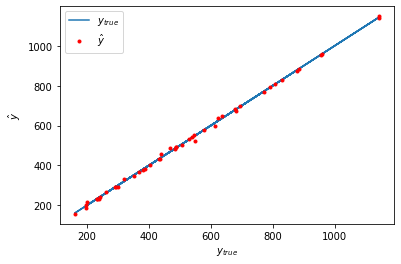

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


data= pd.read_excel("C:/Users/LA202059/Desktop/RHEA/rhea/resources/gasturbine/PW100/Additional_data/jet_thrust.xlsx")
poly = PolynomialFeatures(degree=3)

x_val=poly.fit_transform(data.drop('Newton',axis=1).values)

FR_predicted = loaded_model.predict(x_val)

ytest= data.Newton.values
y= FR_predicted

fig = plt.figure()
plt.plot(ytest, ytest, '-', label='$y_{true}$')
plt.plot(ytest, y, 'r.', label='$\hat{y}$')
   
plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')

plt.legend(loc='upper left')
print('Mean squared error', mean_squared_error(ytest,y)) 
print('Mean absolute error', mean_absolute_error(ytest,y)) 


<AxesSubplot:xlabel='Power'>

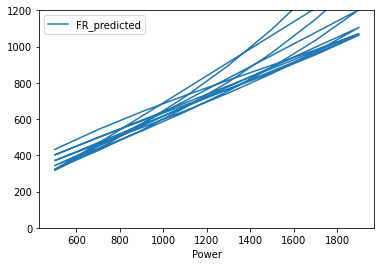

In [44]:
inputs=[]
for alt in [0,2000,4000,6000,8000,10000]:
    for P in [500,700,900,1100,1300,1500,1700,1900]:
        inputs.append([P,alt])
inputs=np.array(inputs)        
x_val=poly.fit_transform(np.array(inputs))

FR_predicted = loaded_model.predict(x_val)

dataset = pd.DataFrame({'Power': inputs[:, 0], 'Altitude': inputs[:, 1]})
dataset['FR_predicted']=FR_predicted
dataset_alt=dataset.loc[dataset.Altitude==0]
data_grouped=dataset.groupby('Altitude').FR_predicted.apply(list).reset_index()
dataset.plot(x='Power',y='FR_predicted',ylim=[0,1200]) 
